In [1]:
from dotenv import load_dotenv
import os

load_dotenv("../../.env")

api_key = os.environ.get("DIFY_API_KEY_ANALYSIS")

In [2]:
import base64


# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


def encode_image_from_pil(pil_image):
    from io import BytesIO
    import PIL.Image

    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [3]:
import PIL.Image


image_path = "img/image-001.png"
# base64_image = encode_image(image_path)

pil_image = PIL.Image.open("img/image-001.png")
base64_image = encode_image_from_pil(pil_image)
base64_image

'iVBORw0KGgoAAAANSUhEUgAABEUAAAN5CAYAAADuBIXgAAEAAElEQVR4nOz9eXhUZZo//r9rT1JJZU9lTyAJJBASgQSFiEZAUKCxiY2aabHpxh6wdaA/tOhPbR3GHtqvje1nZLSVT8sMLT2DSze0CCgIGIWwhS1hSUL2jexbJZWkKrX8/qikSFKnsm9a79d1cV2klnOe2s9zn/u5b5HZbDaDiIiIiIiIiMjBiCd6AEREREREREREE4FBESIiIiIiIiJySAyKEBEREREREZFDYlCEiIiIiIiIiBwSgyJERERERERE5JAYFCEiIiIiIiIihyS1d0VQ+IrxHAcRERERERER0ZirKD5s/T8zRYiIiIiIiIjIITEoQkREREREREQOiUERIiIiIiIiInJIDIoQERERERERkUNiUISIiIiIiIiIHBKDIkRERERERETkkBgUISIiIiIiIiKHxKAIERERERERETkkBkWIiIiIiIiIyCExKEJEREREREREDolBESIiIiIiIiJySAyKEBEREREREZFDYlCEiIiIiIiIiBwSgyJERERERERE5JAYFCEiIiIiIiIih8SgCBERERERERE5JAZFiIiIiIiIiMghMShCRERERERERA6JQREiIiIiIiIickgMihARERERERGRQ2JQhIiIiIiIiIgcEoMiREREREREROSQGBQhIiIiIiIiIofEoMhwrP89sosPo6LXv0/x6fo7N1n00h9xJesDvPukeuLGSQjd8HtcubwT21eN7esQu2QlXnz79zh6+lMUZvweG8LHdHeT0Gak2XwmDiN7X8pED4yIiIiIiMgu6UQPQNCOD1CxJsTm4rzPViB56wSMZ4gWbduJ99ZFQAVg9b//J6Ki/4Rf/jYNpRM9sElg9Yd/xbtLPAGDHjpd96XVOLJlI547Oso7C0/BWxvi4ecFrNv5n0iYNwqvQ1wiVkdORcK9kYiKDEFIsBpqlRyKXp+kePz6dynYtXb/yMZPNOp

In [4]:
import pathlib


ext = pathlib.Path(image_path).suffix.lstrip(".")
ext

'png'

In [5]:
from dify_client import DifyClient

files = [{"type": "image", "transfer_method": "remote_url", "url": f"data:image/{ext};base64,{base64_image}"}]
mime_type = f"image/{ext}"

with open(image_path, "rb") as file:
    files = {"file": (image_path, file, mime_type)}

    response = DifyClient(api_key).file_upload(user="AAA", files=files)
    response.raise_for_status()

In [6]:
response.json()

{'id': '7f9d7968-eee4-4974-9f33-cf84aab61e7d',
 'name': 'img/image-001.png',
 'size': 117654,
 'extension': 'png',
 'mime_type': 'image/png',
 'created_by': '918b1c56-9c4d-4134-b9a6-846ba1d7c794',
 'created_at': 1716572664}

In [7]:
upload_file_id = response.json()["id"]
upload_file_id

'7f9d7968-eee4-4974-9f33-cf84aab61e7d'

In [8]:
from dify_client import ChatClient

# Initialize ChatClient
chat_client = ChatClient(api_key)

# files = [{"type": "image", "transfer_method": "remote_url", "url": "http://...xxx.png"}]
# files = [{
#     "type": "image",
#     "transfer_method": "local_file",
#     "upload_file_id": "your_file_id"
# }]
files = [{"type": "image", "transfer_method": "local_file", "upload_file_id": upload_file_id}]

# Create Chat Message using ChatClient
chat_response = chat_client.create_chat_message(
    inputs={}, query="この画像について教えてくれますか？", user="AAA", response_mode="blocking", files=files
)
chat_response.raise_for_status()

result = chat_response.json()

print(result.get("answer"))

この画像は、「生成AIを活用することでできる9つのこと」と題し、生成AIの具体的な活用例を社内向けと社外向けに分けて一覧にしています。

### 社内向けの活用例:
1. **リサーチ・翻訳・要約・分析**
2. **企画立案・フィードバック**
3. **メール・企画書等の文書作成**
4. **設計・デザイン案作成**
5. **ソフトウェア開発・デバッグ**
6. **チャットボット等による社内知見の検索・業務支援**

### 社外向けの活用例:
7. **文章/画像等のコンテンツ作成**
8. **チャットボット等による顧客対応自動化**
9. **サービス機能・顧客体験の進化**

### ビジネスへの応用提案:
1. **リサーチ・翻訳・要約・分析**
    - **提案**: 生成AIを利用して市場調査データの収集と分析を自動化し、的確なビジネスインサイトを迅速に得る。
    
2. **企画立案・フィードバック**
    - **提案**: 新製品やサービスのアイデア出し、フィードバックの収集に生成AIを活用し、効率的に創造的なプロセスを支援。
    
3. **メール・企画書等の文書作成**
    - **提案**: 生成AIを用いて迅速かつ正確なメール返信や企画書作成を行うことで、業務効率を向上させる。
    
4. **設計・デザイン案作成**
    - **提案**: プロダクトデザインやUI/UX デザインに生成AIを活用し、新しいデザイン案やプロトタイプを迅速に生成。
    
5. **ソフトウェア開発・デバッグ**
    - **提案**: コードの自動生成やエラーチェック、デバッグの効率化を行うために生成AIを導入し、ソフトウェア開発サイクルを短縮。
    
6. **チャットボット等による社内知見の検索・業務支援**
    - **提案**: ナレッジベースの検索や内部問い合わせの自動応答にチャットボットを利用することで、社員の情報アクセスを簡単に。

7. **文章/画像等のコンテンツ作成**
    - **提案**: マーケティングコンテンツやソーシャルメディアの投稿を生成AIにより自動化し、クリエイティブな作業に集中。
    
8. **チャットボット等による顧客対応自動化**
    - **提案

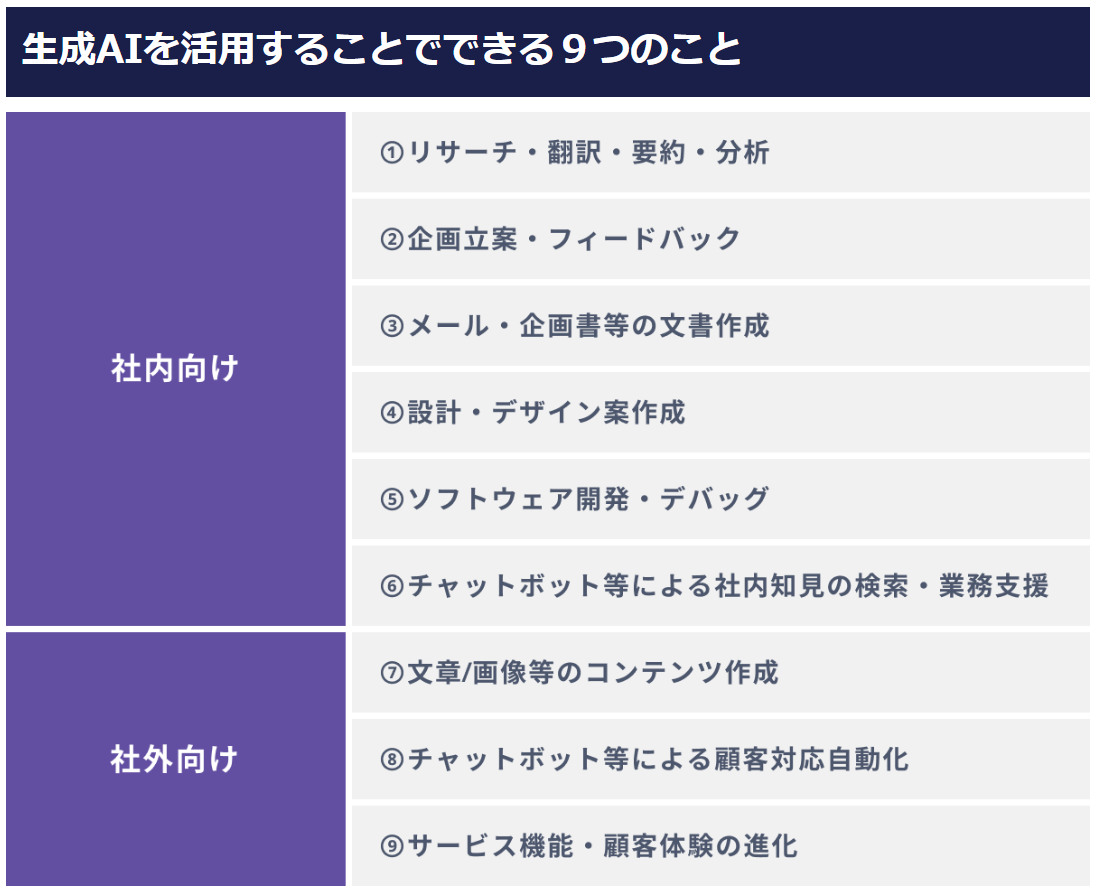

In [9]:
pil_image